Using CP Pruning - Best ccp_alpha: 0.02 MSE: 33.54987646079459 R2: -0.5111307047928288 MAPE: 2.7705264900904263
Using Max Depth - Best max_depth: 8 MSE: 29.33363652644855 R2: -0.3212256948292511 MAPE: 2.5661823071593846


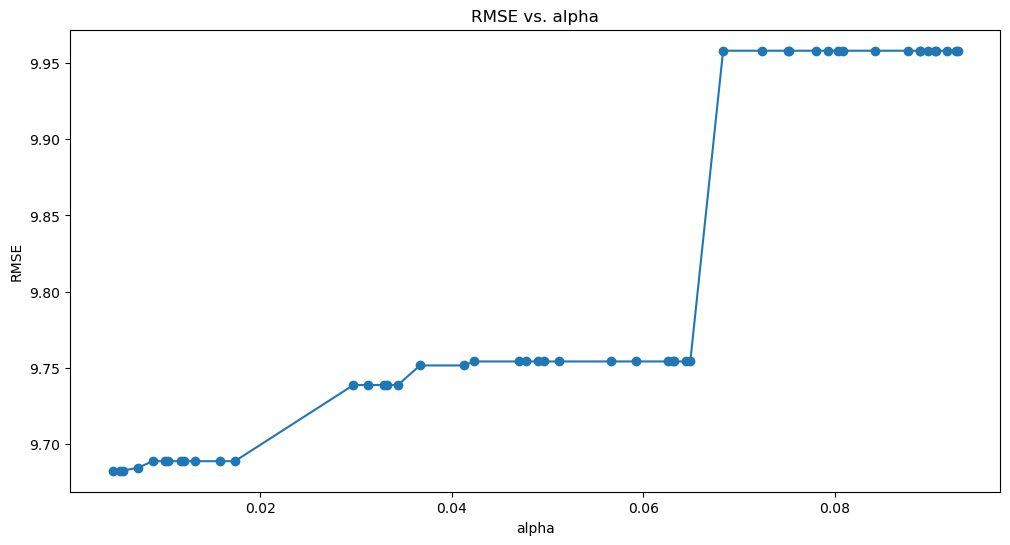

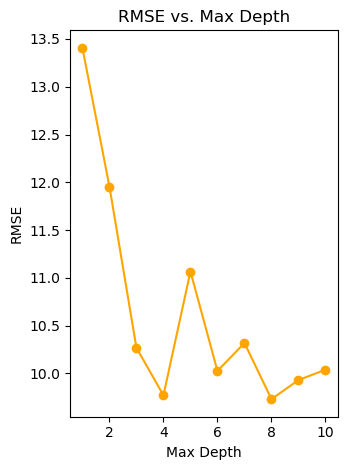

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy.stats import uniform


file_path_new = '/Users/siqinlilv/Desktop/eda/data.xlsx'
data_new = pd.read_excel(file_path_new)


data_new['Year'] = data_new['DATE'].dt.year
data_new['Month'] = data_new['DATE'].dt.month


train_data_new = pd.DataFrame()
test_data_new = pd.DataFrame()


for year in data_new['Year'].unique():
    year_data = data_new[data_new['Year'] == year]
    train_months = year_data[year_data['Month'] <= 10]
    test_months = year_data[year_data['Month'] > 10]
    
    train_data_new = pd.concat([train_data_new, train_months])
    test_data_new = pd.concat([test_data_new, test_months])


target_column = ' ULSP:  Pump price (p/litre)'



X_train_new = train_data.drop(['DATE', target_column, 'Year', 'Month'], axis=1)
y_train_new = train_data[target_column]
X_test_new = test_data.drop(['DATE', target_column, 'Year', 'Month'], axis=1)
y_test_new = test_data[target_column]



tree_regressor = DecisionTreeRegressor(random_state=42)
parameters = {'ccp_alpha': np.linspace(0.0, 0.1, 51)}
clf = GridSearchCV(tree_regressor, parameters, scoring='neg_mean_squared_error')
clf.fit(X_train_new, y_train_new)
best_ccp_alpha = clf.best_params_['ccp_alpha']


tree_with_cp = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
tree_with_cp.fit(X_train_new, y_train_new)


parameters = {'max_depth': range(1, 11)}
clf = GridSearchCV(tree_regressor, parameters, scoring='neg_mean_squared_error')
clf.fit(X_train_new, y_train_new)
best_max_depth = clf.best_params_['max_depth']


tree_with_max_depth = DecisionTreeRegressor(random_state=42, max_depth=best_max_depth)
tree_with_max_depth.fit(X_train_new, y_train_new)


y_pred_cp = tree_with_cp.predict(X_test_new)
mse_cp = mean_squared_error(y_test_new, y_pred_cp)
r2_cp = r2_score(y_test_new, y_pred_cp)
mape_cp = np.mean(np.abs((y_test_new - y_pred_cp) / y_test_new)) * 100

y_pred_max_depth = tree_with_max_depth.predict(X_test_new)
mse_max_depth = mean_squared_error(y_test_new, y_pred_max_depth)
r2_max_depth = r2_score(y_test_new, y_pred_max_depth)
mape_max_depth = np.mean(np.abs((y_test_new - y_pred_max_depth) / y_test_new)) * 100


print("Using CP Pruning - Best ccp_alpha:", best_ccp_alpha, "MSE:", mse_cp, "R2:", r2_cp, "MAPE:", mape_cp)
print("Using Max Depth - Best max_depth:", best_max_depth, "MSE:", mse_max_depth, "R2:", r2_max_depth, "MAPE:", mape_max_depth)

# Randomized search with CP pruning decision tree model
tree_regressor = DecisionTreeRegressor(random_state=42)
parameters = {'ccp_alpha': uniform(0.0, 0.1)}
clf = RandomizedSearchCV(tree_regressor, parameters, scoring='neg_mean_squared_error', n_iter=50)
clf.fit(X_train, y_train)

# Extract RMSE for each alpha value
rmse_cp = np.sqrt(-clf.cv_results_['mean_test_score'])
alphas = clf.cv_results_['param_ccp_alpha'].data

# Randomized search with max depth decision tree model
parameters = {'max_depth': range(1, 11)}
clf = RandomizedSearchCV(tree_regressor, parameters, scoring='neg_mean_squared_error', n_iter=10)
clf.fit(X_train, y_train)

# Extract RMSE for each max_depth value
rmse_max_depth = np.sqrt(-clf.cv_results_['mean_test_score'])
max_depths = clf.cv_results_['param_max_depth'].data

# Plotting the first graph: RMSE vs. alpha
sorted_indices = np.argsort(alphas)
sorted_alphas = alphas[sorted_indices]
sorted_rmse_cp = rmse_cp[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(sorted_alphas, sorted_rmse_cp, marker='o')
plt.title('RMSE vs. alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

# Plotting the second graph: RMSE vs. Max Depth
plt.subplot(1, 2, 2)
plt.plot(max_depths, rmse_max_depth, marker='o', color='orange')
plt.title('RMSE vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

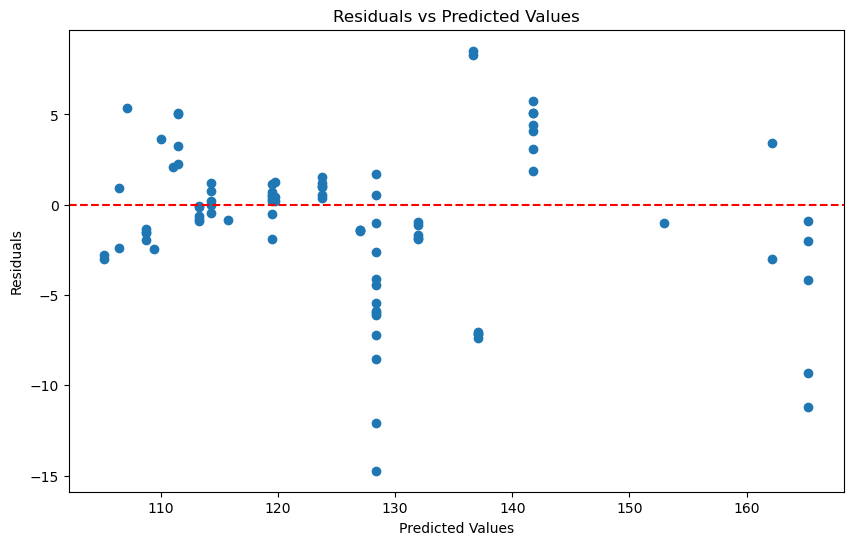

Number of residuals: 87


In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


file_path = '/Users/siqinlilv/Desktop/eda/data.xlsx'
data = pd.read_excel(file_path)


data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month


train_data = pd.DataFrame()
test_data = pd.DataFrame()

for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    train_months = year_data[year_data['Month'] <= 10]
    test_months = year_data[year_data['Month'] > 10]
    
    train_data = pd.concat([train_data, train_months])
    test_data = pd.concat([test_data, test_months])


target_column = ' ULSP:  Pump price (p/litre)'


X_train = train_data.drop(['DATE', target_column, 'Year', 'Month'], axis=1)
y_train = train_data[target_column]
X_test = test_data.drop(['DATE', target_column, 'Year', 'Month'], axis=1)
y_test = test_data[target_column]


tree_regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=0.005)
tree_regressor.fit(X_train, y_train)


y_pred = tree_regressor.predict(X_test)


residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


print(f"Number of residuals: {len(residuals)}")


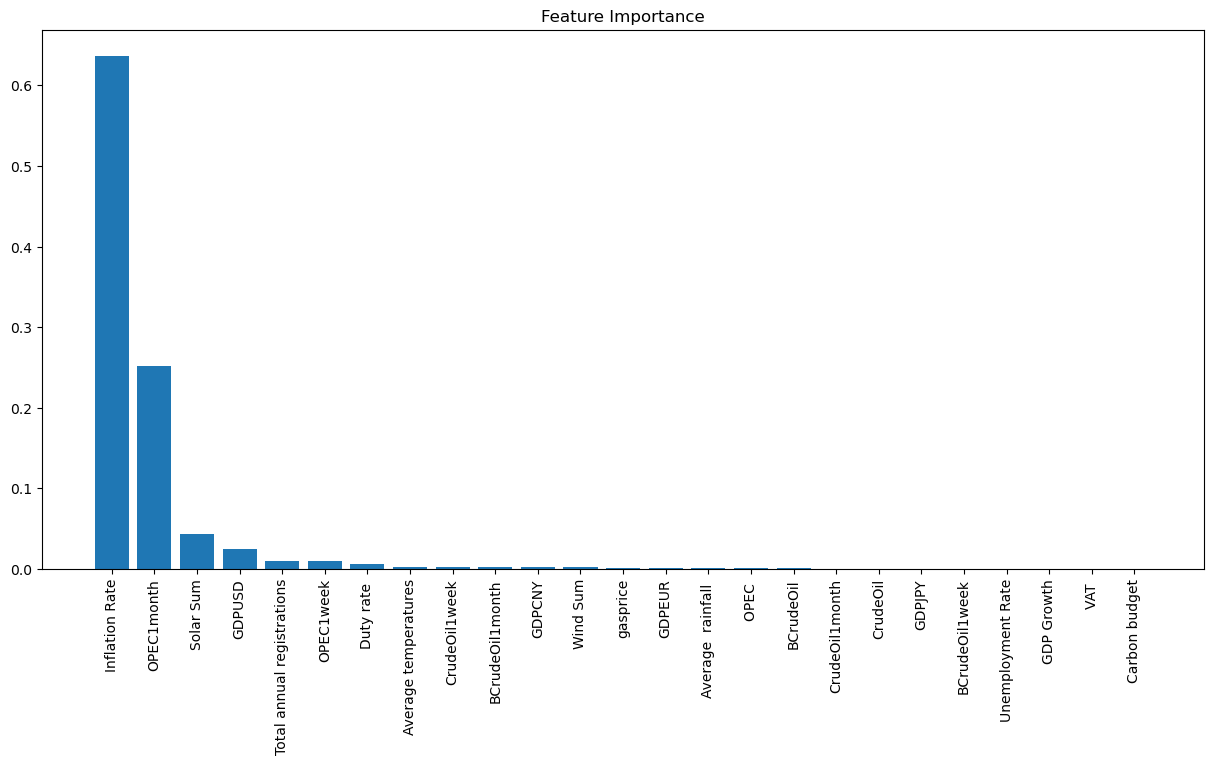

In [16]:
# Feature importance in the regression tree
feature_importance = tree_regressor.feature_importances_
features = X_train.columns

# Sorting the feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create the plot
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


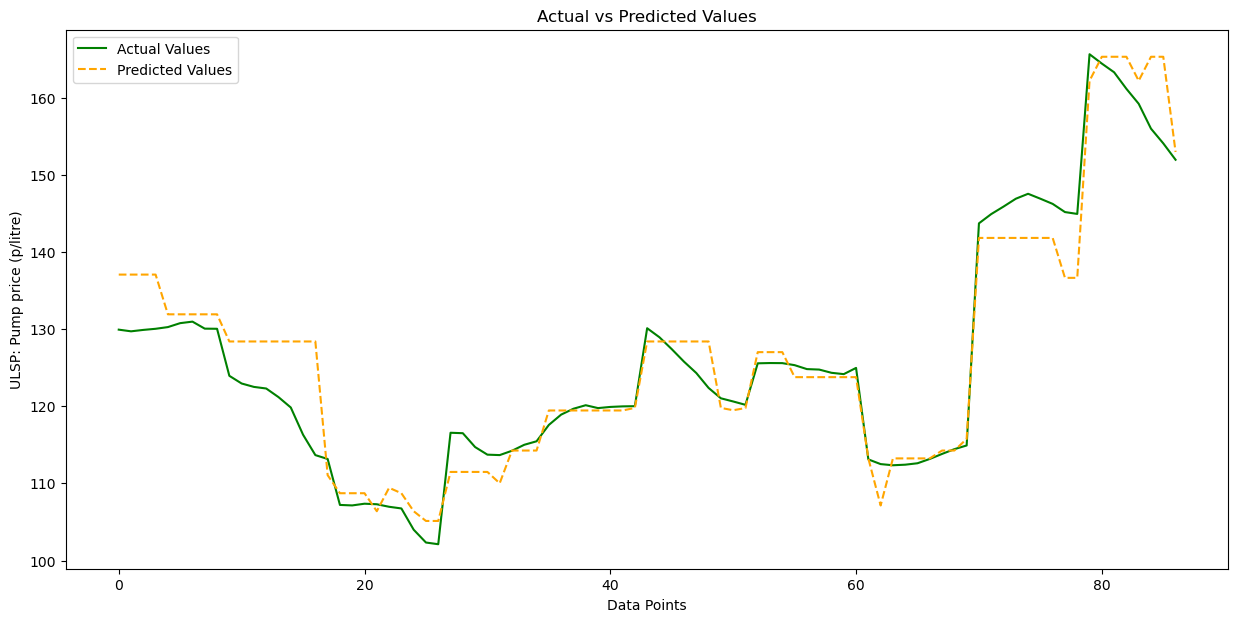

In [18]:

plt.figure(figsize=(15, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='green')
plt.plot(y_pred, label='Predicted Values', color='orange', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('ULSP: Pump price (p/litre)')
plt.legend()
plt.show()
